In [161]:
import numpy as np
import pandas as pd
import os,warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

In [359]:
raw_data=pd.read_csv("bank (1).csv")

In [163]:
raw_data.shape

(11162, 17)

In [164]:
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [165]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [166]:
raw_data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [167]:
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [168]:
px.histogram(raw_data, x = 'age', title = 'age vs deposit', color = 'deposit')

In [169]:
px.histogram(raw_data, x = 'marital', title = 'marital vs deposit', color = 'deposit')

In [392]:
px.strip(raw_data.sample(10000), x = 'age', y = 'loan', title = 'age vs loan', color = 'deposit')

In [171]:
px.histogram(raw_data, x = 'loan', title = 'loan vs deposit', color = 'deposit')

In [172]:
px.histogram(raw_data, x = 'balance', title = 'balance vs deposit', color = 'deposit')

In [173]:
px.histogram(raw_data, x = 'housing', title = 'housing vs deposit', color = 'deposit')

In [174]:
px.histogram(raw_data, x = 'duration', title = 'duration vs deposit', color = 'deposit')

In [175]:
px.histogram(raw_data, x = 'month', title = 'month vs deposit', color = 'deposit')

In [176]:
#it is quite 
#common to split the data into three sets, training sets, validation set and test set.

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
train_val_df, test_df = train_test_split(raw_data, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [179]:
print(train_val_df.shape)

(8929, 17)


In [180]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (6696, 17)
val_df.shape : (2233, 17)
test_df.shape : (2233, 17)


In [181]:
input_cols = list(train_df.columns)[:-1]
target_col = 'deposit'

In [182]:
print(input_cols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [183]:
print(target_col)

deposit


In [184]:
type(target_col)

str

In [185]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [186]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [187]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [188]:
train_targets

5613      no
5988      no
5952      no
1001     yes
7916      no
        ... 
3607     yes
6680      no
85       yes
10494     no
3174     yes
Name: deposit, Length: 6696, dtype: object

In [189]:
train_inputs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5613,57,unemployed,married,secondary,no,1350,no,no,cellular,25,jun,131,1,388,1,failure
5988,31,blue-collar,single,secondary,no,530,no,yes,cellular,18,nov,251,2,-1,0,unknown
5952,43,housemaid,married,primary,no,0,yes,no,cellular,25,aug,152,3,-1,0,unknown
1001,32,technician,single,secondary,no,6402,yes,no,cellular,20,nov,628,1,-1,0,unknown
7916,52,blue-collar,married,tertiary,no,297,yes,no,unknown,7,may,55,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,27,admin.,single,unknown,no,861,no,no,cellular,14,jun,212,4,-1,0,unknown
6680,35,admin.,married,secondary,no,786,no,yes,cellular,25,jul,322,1,-1,0,unknown
85,27,technician,single,tertiary,no,3706,yes,no,unknown,16,may,897,1,-1,0,unknown
10494,57,management,married,secondary,no,123,no,no,cellular,2,feb,154,2,-1,0,unknown


In [190]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [191]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [192]:
train_inputs[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000
mean,41.358124,1547.230884,15.673088,366.760603,2.514785,50.422939,0.812873
std,11.981509,3306.482048,8.406649,339.284992,2.732006,107.435256,2.199889
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,124.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,551.000000,15.000000,253.000000,2.000000,-1.000000,0.000000
75%,49.000000,1723.000000,22.000000,490.000000,3.000000,2.500000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,828.000000,58.000000


In [193]:
train_inputs[categorical_cols].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,6696,6696,6696,6696,6696,6696,6696,6696,6696
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,no,no,cellular,may,unknown
freq,1587,3821,3274,6596,3577,5809,4852,1683,5013


In [194]:
train_inputs[categorical_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [195]:
#imputation is a technique to fill out Nan values with some average value sklearn.impute

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
scaler = MinMaxScaler()

In [198]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [199]:
print('maximum')
list(scaler.data_max_)

maximum


[95.0, 81204.0, 31.0, 3881.0, 63.0, 828.0, 58.0]

In [200]:
print('minimum')
list(scaler.data_min_)

minimum


[18.0, -3058.0, 1.0, 2.0, 1.0, -1.0, 0.0]

In [201]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [202]:
train_inputs[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000,6696.000000
mean,0.303352,0.054654,0.489103,0.094035,0.024432,0.062030,0.014015
std,0.155604,0.039240,0.280222,0.087467,0.044065,0.129596,0.037929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.037763,0.233333,0.035061,0.000000,0.000000,0.000000
50%,0.272727,0.042831,0.466667,0.064707,0.016129,0.000000,0.000000
75%,0.402597,0.056740,0.700000,0.125806,0.032258,0.004222,0.017241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
val_inputs[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,0.297340,0.053385,0.483356,0.097605,0.023894,0.063524,0.013906
std,0.150604,0.030289,0.285371,0.094119,0.042319,0.135339,0.038433
min,0.000000,0.009209,0.000000,0.000258,0.000000,0.000000,0.000000
25%,0.181818,0.037644,0.233333,0.034803,0.000000,0.000000,0.000000
50%,0.259740,0.042653,0.466667,0.065223,0.016129,0.000000,0.000000
75%,0.389610,0.056336,0.700000,0.127610,0.032258,0.000000,0.000000
max,0.922078,0.344224,1.000000,0.799175,0.677419,1.031363,0.637931


In [204]:
test_inputs[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,0.301173,0.054813,0.492342,0.097208,0.024457,0.066008,0.015821
std,0.156092,0.042299,0.277411,0.090692,0.044984,0.131750,0.044876
min,0.000000,-0.044967,0.000000,0.000516,0.000000,0.000000,0.000000
25%,0.181818,0.037811,0.266667,0.035061,0.000000,0.000000,0.000000
50%,0.259740,0.042902,0.466667,0.067028,0.016129,0.000000,0.000000
75%,0.402597,0.056039,0.700000,0.129415,0.032258,0.106152,0.017241
max,0.974026,1.000000,1.000000,0.846094,0.677419,0.997587,0.948276


In [205]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown = "ignore")

In [206]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [207]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [208]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [209]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [210]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [211]:
train_inputs[encoded_cols]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
5613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5988,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10494,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [212]:
val_inputs[encoded_cols]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
934,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10374,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9341,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8805,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [213]:
test_inputs[encoded_cols]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
5527,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1964,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [214]:
from sklearn.linear_model import LogisticRegression

In [321]:
model = LogisticRegression(solver = "lbfgs", max_iter = 1000)

In [322]:
%%time
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: total: 297 ms
Wall time: 151 ms


LogisticRegression(max_iter=1000)

In [323]:
#print length of each array
print(len(numeric_cols), len(encoded_cols))

7 44


In [393]:
weight_df = pd.DataFrame({'features': (numeric_cols + encoded_cols),
              'weight': model.coef_.tolist()[0]
             })
print(weight_df)

               features     weight
0                   age   0.063130
1               balance   0.876102
2                   day   0.007035
3              duration  16.218007
4              campaign  -2.465393
5                 pdays  -0.520289
6              previous   0.533707
7            job_admin.   0.144358
8       job_blue-collar  -0.086753
9      job_entrepreneur  -0.092800
10        job_housemaid  -0.179392
11       job_management  -0.131357
12          job_retired   0.348684
13    job_self-employed  -0.245775
14         job_services  -0.093931
15          job_student   0.548480
16       job_technician   0.045984
17       job_unemployed  -0.102562
18          job_unknown  -0.152745
19     marital_divorced   0.039984
20      marital_married  -0.116501
21       marital_single   0.078710
22    education_primary  -0.255784
23  education_secondary  -0.033823
24   education_tertiary   0.246868
25    education_unknown   0.044932
26           default_no  -0.118239
27          default_

In [325]:
print(model.intercept_)

[-0.81899319]


<AxesSubplot:xlabel='weight', ylabel='features'>

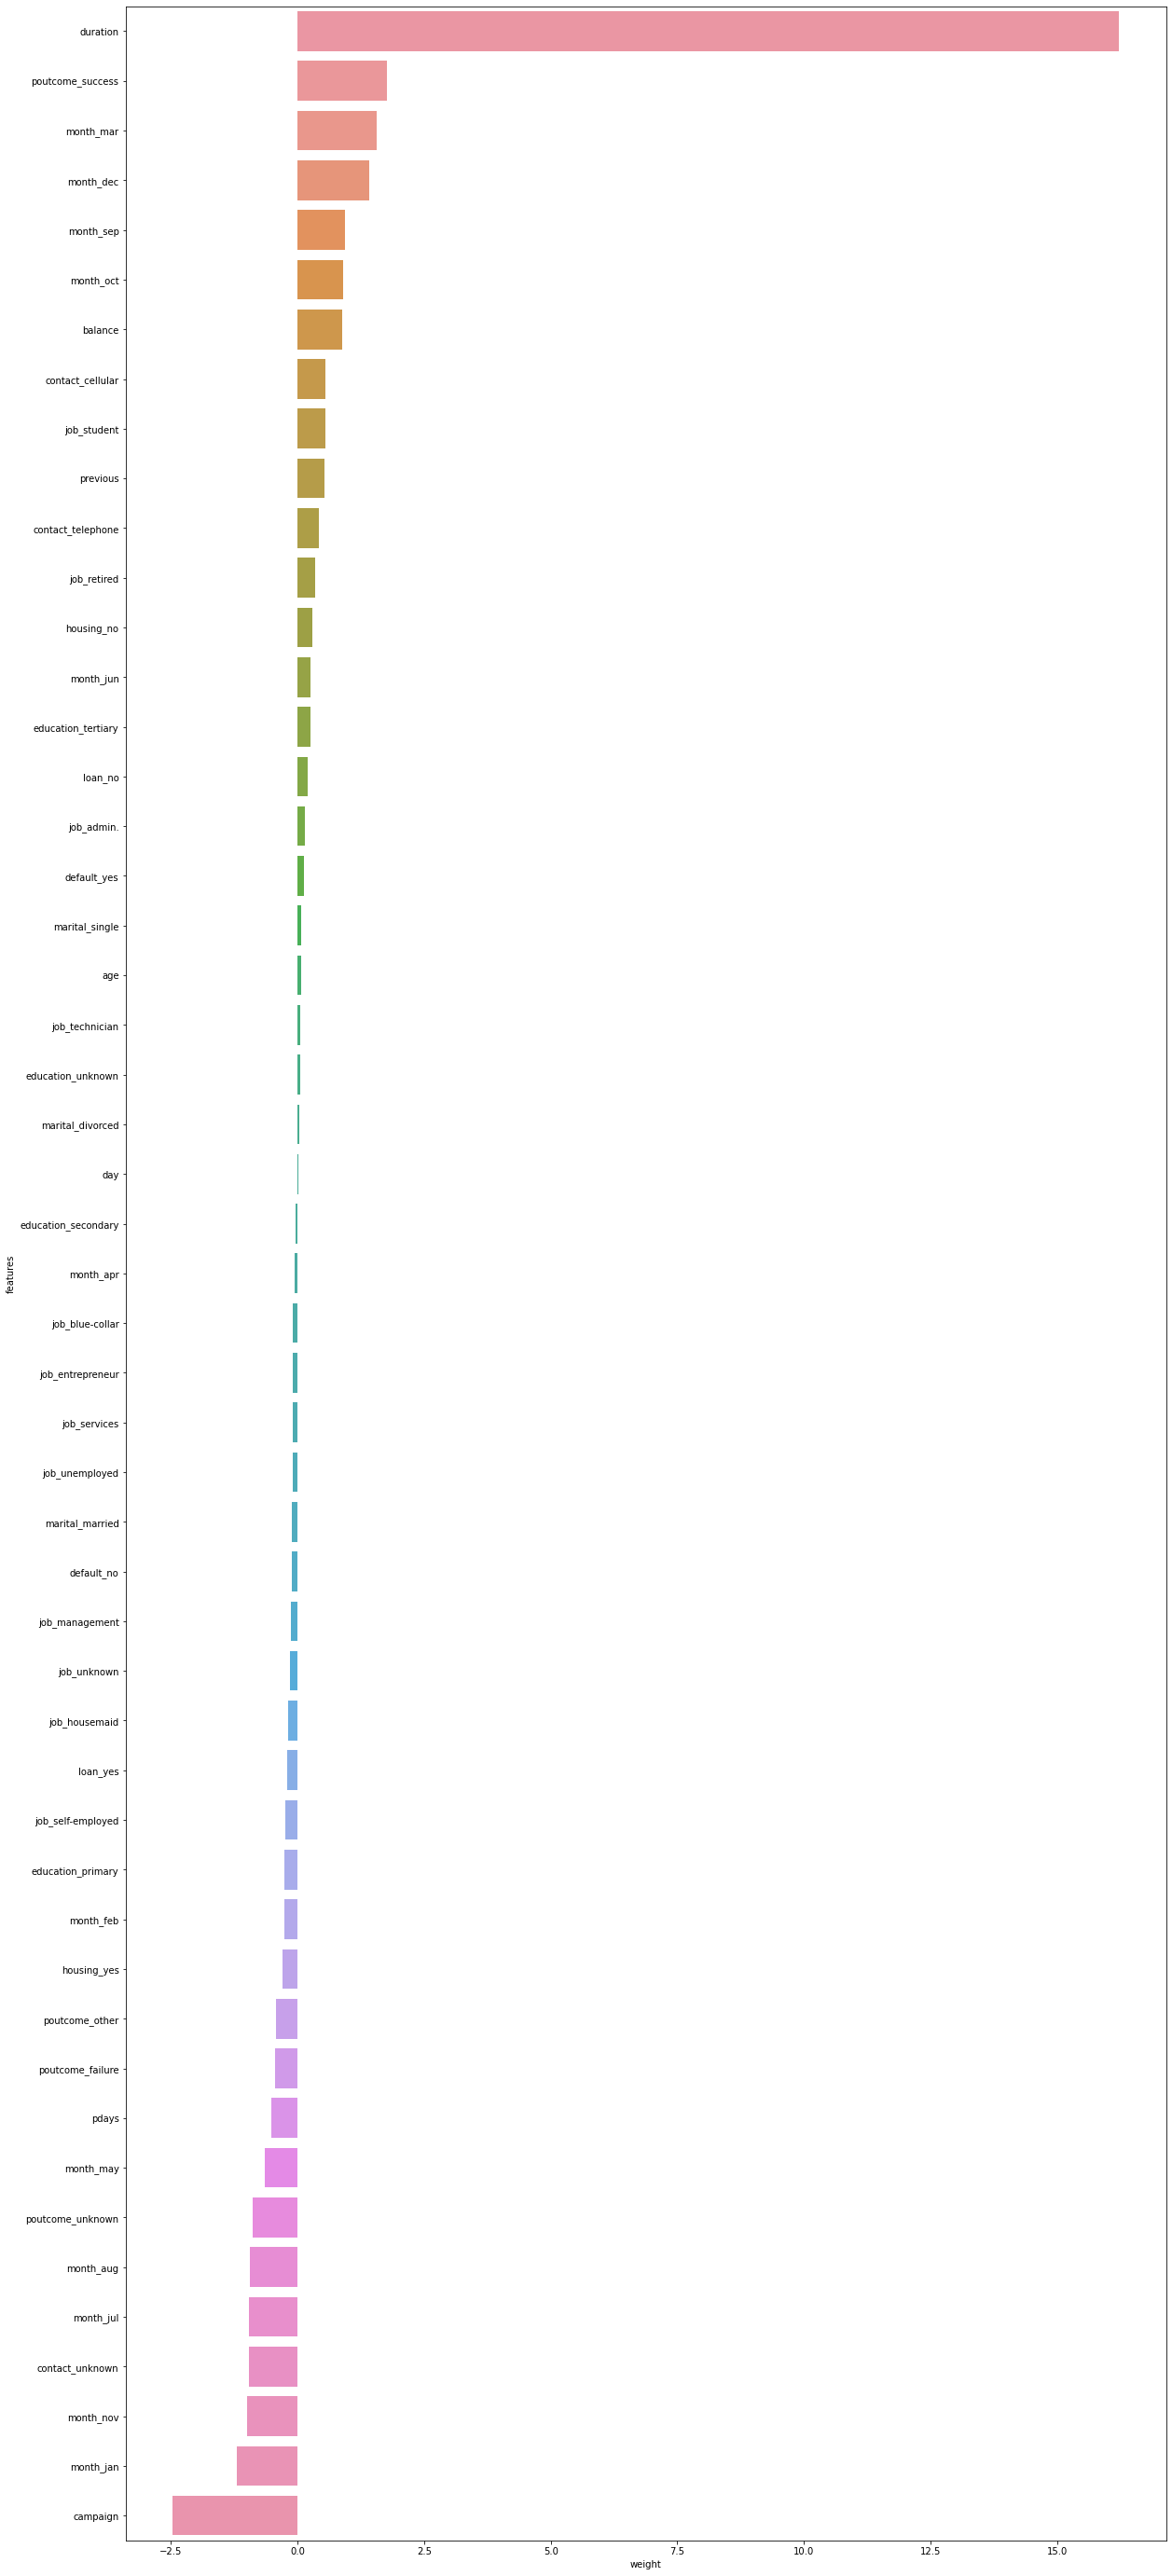

In [326]:
plt.figure(figsize= (20,50))
sns.barplot(data = weight_df.sort_values('weight', ascending = False), x = 'weight', y= 'features')

In [221]:
# Making predictions and Evaluating model

In [327]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val   = val_inputs[numeric_cols + encoded_cols]
X_test  = test_inputs[numeric_cols + encoded_cols]

In [328]:
train_pred = model.predict(X_train)
train_pred

array(['yes', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

In [224]:
train_targets

5613      no
5988      no
5952      no
1001     yes
7916      no
        ... 
3607     yes
6680      no
85       yes
10494     no
3174     yes
Name: deposit, Length: 6696, dtype: object

In [225]:
relation = pd.DataFrame({'predic': train_pred,
              'target': train_targets
             })
relation

,predic,target
5613,yes,no
5988,no,no
5952,no,no
1001,yes,yes
7916,no,no
...,...,...
3607,yes,yes
6680,no,no
85,yes,yes
10494,no,no


In [226]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.48884598, 0.51115402],
       [0.76479464, 0.23520536],
       [0.90527317, 0.09472683],
       ...,
       [0.33999905, 0.66000095],
       [0.6619232 , 0.3380768 ],
       [0.06950245, 0.93049755]])

In [227]:
model.classes_

array(['no', 'yes'], dtype=object)

In [228]:
# check accuracy

In [329]:
from sklearn.metrics import accuracy_score

In [330]:
accuracy_score(train_targets, train_pred)

0.8248207885304659

In [331]:
from sklearn.metrics import confusion_matrix

In [522]:
cm = confusion_matrix(train_targets, train_pred, normalize = 'true')

In [233]:
#among actual no all the deposit suppose to be no it predicts 86% it predicts "no"
#among the casess when actual deposit is "yes" it predicted "no" and its 78%times its yes 

In [333]:
def predict_and_plot(inputs, targets, name = ''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize = "true")
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title("{} Confusion Matrix".format(name));
    
    return preds

Accuracy: 82.48%


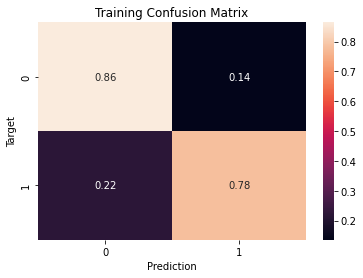

In [334]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 82.89%


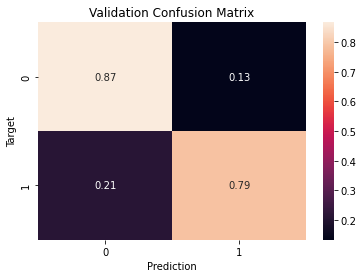

In [236]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 80.88%


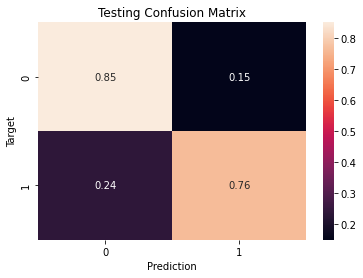

In [237]:
test_preds = predict_and_plot(X_test, test_targets, 'Testing')

In [238]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    # input_df[numeric_cols] = #imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0] # for 1 row
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred,prob

In [239]:
new_input = {'age' : "95",
             'job' : "no",
             'marital': 'single',
             'education' : 'primary',
             'default': 'no',
             'balance': '5',
             'housing': 'yes',
             'loan': "no",
             'contact': 'unknown',
             'day': '25',
             'month': 'december',
             'duration' : "2",
             'campaign': '3',
             'pdays': '-1',
            'previous': '0',
            'poutcome': 'unkown'}


In [240]:
predict_input(new_input)

('no', 0.8869948898355735)

## Naive Bayes Classification


In [540]:
from sklearn.naive_bayes import GaussianNB
modelG = GaussianNB().fit(train_inputs[numeric_cols + encoded_cols], train_targets)


UsageError: Line magic function `%%time` not found.


In [543]:
%%time
modelG

CPU times: total: 0 ns
Wall time: 0 ns


GaussianNB()

In [243]:
X_trainN = train_inputs[numeric_cols + encoded_cols]
X_valN   = val_inputs[numeric_cols + encoded_cols]
X_testN  = test_inputs[numeric_cols + encoded_cols]

In [244]:
train_predN = modelG.predict(X_trainN)
train_predN

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype='<U3')

In [256]:
train_probsN = modelG.predict_proba(X_trainN)
train_probsN

array([[1.34337558e-02, 9.86566244e-01],
       [9.99995248e-01, 4.75184434e-06],
       [9.99999544e-01, 4.56379949e-07],
       ...,
       [9.99360617e-01, 6.39382647e-04],
       [8.73346808e-01, 1.26653192e-01],
       [5.67803342e-25, 1.00000000e+00]])

In [257]:
accuracy_score(train_targets, train_predN)

0.7193847072879331

In [258]:
confusion_matrix(train_targets, train_predN, normalize = 'true')

array([[0.87065801, 0.12934199],
       [0.4503962 , 0.5496038 ]])

Accuracy: 71.94%


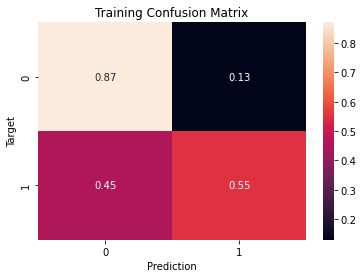

In [259]:
train_predsN = predict_and_plot(X_trainN, train_targets, 'Training')

Accuracy: 70.89%


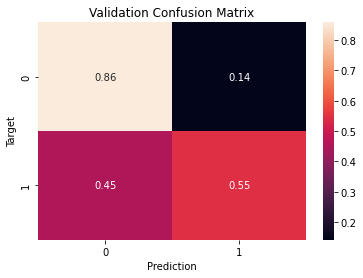

In [260]:
val_predsN = predict_and_plot(X_valN, val_targets, 'Validation')

Accuracy: 72.77%


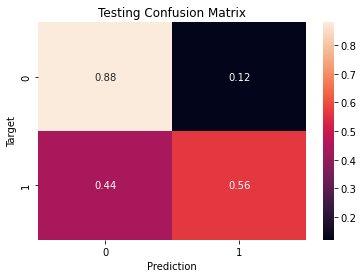

In [261]:
test_predsN = predict_and_plot(X_testN, test_targets, 'Testing')

## SVM

In [541]:
from sklearn.svm import SVC
classifier = SVC(kernel  = 'rbf', C = 30, gamma = 'auto')


UsageError: Line magic function `%%time` not found.


In [542]:
%%time
classifier.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: total: 2.14 s
Wall time: 3.36 s


SVC(C=30, gamma='auto')

In [451]:
X_trainS = train_inputs[numeric_cols + encoded_cols]
X_valS   = val_inputs[numeric_cols + encoded_cols]
X_testS  = test_inputs[numeric_cols + encoded_cols]

In [452]:
train_predS = model.predict(X_trainS)
train_predS

array(['yes', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

In [453]:
train_probsS = model.predict_proba(X_trainS)
train_probsS

array([[0.48826739, 0.51173261],
       [0.76486881, 0.23513119],
       [0.9053685 , 0.0946315 ],
       ...,
       [0.3399877 , 0.6600123 ],
       [0.6616362 , 0.3383638 ],
       [0.06969343, 0.93030657]])

In [455]:
accuracy_score(train_targets, train_predS)

0.8248207885304659

In [386]:
confusion_matrix(train_targets, train_predS, normalize = 'true')

array([[0.86444507, 0.13555493],
       [0.21965135, 0.78034865]])

In [511]:
support_vectors_per_class = classifier.n_support_
print(support_vectors_per_class)

[1483 1496]


In [484]:
from mpl_toolkits import mplot3d

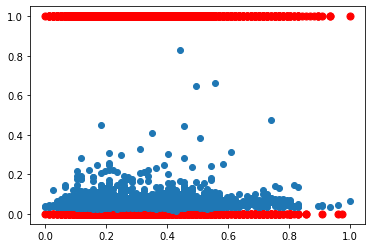

In [508]:
#y == 'target_col'
plt.scatter(X_trainS.iloc[:, 0], X_trainS.iloc[:,-1], c= 'red', s=50, cmap='autumn')
plt.scatter(classifier.support_vectors_[:,0],classifier.support_vectors_[:,1])

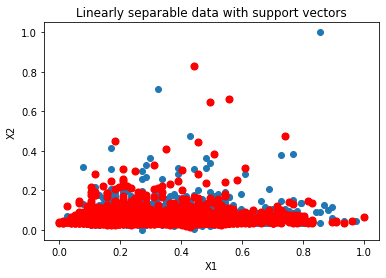

In [520]:
# Visualize support vectors
plt.scatter(X_trainS.iloc[:,0], X_trainS.iloc[:,1])
plt.scatter(classifier.support_vectors_[:,0], classifier.support_vectors_[:,1], color='red', s=50, cmap='autumn')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

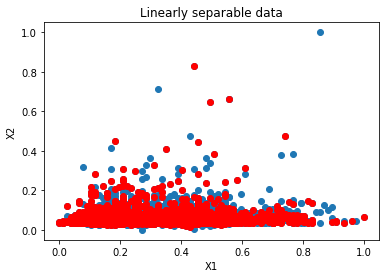

In [513]:
plt.scatter(X_trainS.iloc[:,0], X_trainS.iloc[:,1])
plt.scatter(classifier.support_vectors_[:,0], classifier.support_vectors_[:,1], color='red')
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



ValueError: X has 2 features, but SVC is expecting 51 features as input.

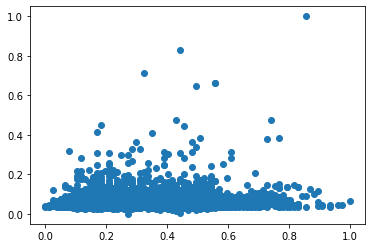

In [515]:
ax = plt.gca()
plt.scatter(X_trainS.iloc[:, 0], X_trainS.iloc[:, 1])#, c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Accuracy: 82.48%


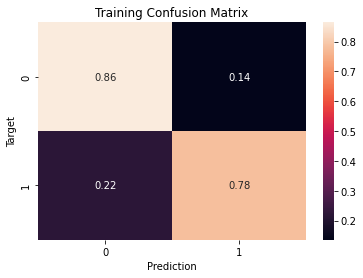

In [456]:
train_predsS = predict_and_plot(X_trainS, train_targets, 'Training')

Accuracy: 82.89%


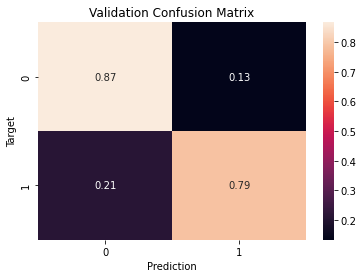

In [389]:
val_predsS = predict_and_plot(X_valS, val_targets, 'Validation')

Accuracy: 80.88%


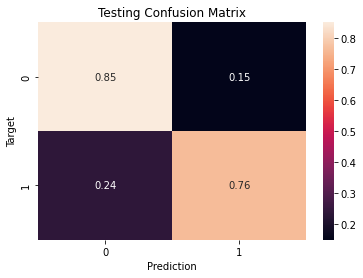

In [388]:
test_predsS = predict_and_plot(X_testS, test_targets, 'Testing')

## KN Classifier

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [440]:
neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski', p=2)


KNeighborsClassifier(n_neighbors=3)

In [544]:
%%time
neigh.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: total: 0 ns
Wall time: 32.7 ms


KNeighborsClassifier(n_neighbors=3)

In [446]:
X_trainK = train_inputs[numeric_cols + encoded_cols]
X_valK   = val_inputs[numeric_cols + encoded_cols]
X_testK  = test_inputs[numeric_cols + encoded_cols]

In [448]:
train_predK = model.predict(X_trainK)
train_predK
test_predk = model.predict(X_testK)
test_predk

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'yes'], dtype=object)

In [437]:
train_probsK = model.predict_proba(X_trainK)
train_probsK
test_probK = model.predict

array([[0.48826739, 0.51173261],
       [0.76486881, 0.23513119],
       [0.9053685 , 0.0946315 ],
       ...,
       [0.3399877 , 0.6600123 ],
       [0.6616362 , 0.3383638 ],
       [0.06969343, 0.93030657]])

In [545]:
%%time
accuracy_score(train_targets, train_predK)

CPU times: total: 15.6 ms
Wall time: 24.9 ms


0.8248207885304659

In [423]:
confusion_matrix(train_targets, train_predK, normalize = 'true')

array([[0.86444507, 0.13555493],
       [0.21965135, 0.78034865]])

Accuracy: 82.48%


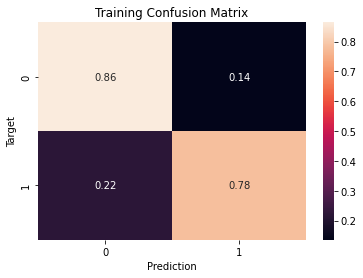

In [424]:
train_predsK = predict_and_plot(X_trainK, train_targets, 'Training')

Accuracy: 82.89%


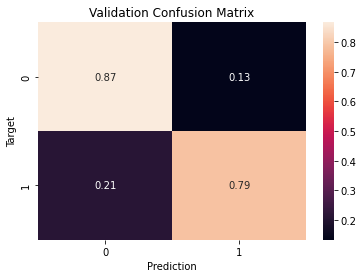

In [402]:
val_predsK = predict_and_plot(X_valK, val_targets, 'Validation')

Accuracy: 80.88%


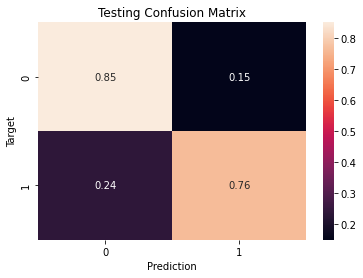

In [403]:
test_predsK = predict_and_plot(X_testK, test_targets, 'Testing')

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [439]:
knnclassifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski', p=2)
KNN = print('KNN :' , cross_val_score(knnclassifier, X_trainK, train_targets, cv=10, scoring ='accuracy').mean())

KNN : 0.7208828057024295


In [376]:
logreg= LogisticRegression(solver = "lbfgs", max_iter = 1000)
Logistic_Reg = print('Logistic_Reg :', cross_val_score(logreg, train_inputs[numeric_cols + encoded_cols], train_targets, cv=10, scoring ='accuracy').mean())

Logistic_Reg : 0.8198893425250431


In [378]:
GB = GaussianNB()
GB = print('GB :', cross_val_score(GB, train_inputs[numeric_cols + encoded_cols], train_targets, cv=10, scoring ='accuracy').mean())

GB : 0.7159456082814626


In [457]:
classifier = SVC(kernel  = 'rbf', C = 30, gamma = 'auto')
SVM = print('SVM :', cross_val_score(classifier, train_inputs[numeric_cols + encoded_cols], train_targets, cv=10, scoring ='accuracy').mean())

SVM : 0.8451330789996208
